In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
BATCH_SIZE = 64
eval_period_list = [2,5,10]
dataset_name = 'MNIST'
Total_budget = 60
rand_list = []
noise = 'clean'
# Total_budget = 60
period = 5
Repeat = 5

path = 'exp2_MNIST'

In [29]:

# path = 'exp_10_2/'
for dataset_name in ['MNIST']:
    
    Models = np.zeros((7,Total_budget//period,Repeat ))
    
    Transpoint =  np.zeros((2,Repeat))
    
    for run_index in range(Repeat):
#  ['cardiotocography','statlog-landsat','yeast','waveform','wine-quality-red']

#         result = [acc_rand_list, acc_entropy_list, acc_margin_list, acc_base_list, acc_dpp_list_old,acc_a1_list,acc_a2_list, Status_list1, Status_list2, e_index,margin_index,base_index,dpp_index,a1_index,a2_index ]
    #     results = np.array(result,dtype=object)

        

#         name =  f'{dataset_name}_{run_index}'
    #     np.save(path+name+'.npy', results)
        filename = path+'/{}_Total_{}_batch_{}'.format(run_index,Total_budget,BATCH_SIZE)+dataset_name+'.npy'
        results = np.load(filename,allow_pickle=True)
    #     [acc_entropy_list_f_all,acc_entropy_list_all,acc_base_list_f_all,acc_base_list_all,acc_rand_list,acc_test_rand,acc_test_gt_temp]=results
    #     [acc_entropy_list_f_all,acc_entropy_list_all,acc_base_list_f_all,acc_base_list_all,acc_rand_list,acc_test_rand,acc_test_gt_temp,acc_dpp_list_f_all,acc_dpp_list_f_all,acc_base2_list_f_all,acc_base2_list_all]=results
        
        
#         results = [acc_entropy_list_f_all,acc_entropy_list_all,acc_base_list_f_all,acc_base_list_all,acc_rand_list,acc_test_rand,acc_test_gt_temp,acc_dpp_list_f_all,acc_dpp_list_all,acc_base2_list_f_all,acc_base2_list_all,acc_dpp_list_f_old_all,acc_dpp_old_list_all]=results
        [ acc_adpative_1_list_all,acc_adpative_2_list_all,acc_adpative_1_f_all,acc_adpative_2_f_all, \
               acc_entropy_list_f_all,acc_entropy_list_all,acc_base_list_f_all,acc_base_list_all,acc_rand_list,acc_rand_list_all, \
               acc_test_rand,acc_test_rand_all,acc_test_gt_temp,acc_dpp_list_f_all,acc_dpp_list_all,acc_base2_list_f_all,acc_base2_list_all,\
                   acc_dpp_list_f_old_all,acc_dpp_old_list_all,acc_margin_list_f_all,acc_margin_list_all,acc_test_gt,Status_list1,Status_list2] =results 
        
#         acc_all = np.mean(all_test[-20:])+acc_all
        rand_list.append(np.mean(np.array(acc_rand_list)[:,1,:]))
        
        Models[0,:,run_index] = np.mean(np.array(acc_adpative_1_list_all)[0,::period,1,-20:],axis=1)
        Models[1,:,run_index] = np.mean(np.array(acc_adpative_2_list_all)[0,::period,1,-20:],axis=1)
        Models[2,:,run_index] = np.mean(np.array(acc_dpp_old_list_all)[0,::period,1,-20:],axis=1)
        Models[3,:,run_index] = np.mean(np.array(acc_base2_list_all)[0,::period,1,-20:],axis=1)
        Models[4,:,run_index] = np.mean(np.array(acc_entropy_list_all)[0,::period,1,-20:],axis=1)
        Models[5,:,run_index] = np.mean(np.array(acc_base_list_all)[0,::period,1,-20:],axis=1)
        Models[6,:,run_index] = np.mean(np.array(acc_rand_list)[::period,1,-20:],axis=1)
        Transpoint[0,run_index] = np.mean(Status_list1)
        Transpoint[1,run_index] = np.mean(Status_list2)
        

In [30]:
eval_period_list = [5]

In [31]:
# legend_00 =['RD-DPP (Two Stage) ('+str(i/5)+')' for i in [5,10]]
# # legend_0 = ['RD-DPP (only diversity)LOG T ='+str(i) for i in eval_period_list]
# legend_1 = ['Greedy Rate Gain T ='+str(i) for i in eval_period_list]
# legend_2 = ['Marginal Rate Gain T ='+str(i) for i in eval_period_list]
# legend_3 = ['RD-DPP (Only Diversity) T ='+str(i) for i in eval_period_list]
# # legend_4 = ['DPP Period OLD ='+str(i) for i in eval_period_list]
# legend_5 = ['Uncertainty Dec. T ='+str(i) for i in eval_period_list]
# legend_8 = ['Min Margin Dec. T ='+str(i) for i in eval_period_list]

# legend_9 = ['Rand']

# legend_00 =['RD-DPP (Two Stage) ('+str(i/5)+')' for i in [5,10]]
legend_00 =['RD-DPP (Two Stage)','RD-DPP (Two Stage)']
# legend_0 = ['RD-DPP (only diversity)LOG T ='+str(i) for i in eval_period_list]
legend_1 = ['Greedy Rate Gain']
legend_2 = ['Marginal Rate Gain']
legend_3 = ['RD-DPP (Only Diversity)']
# legend_4 = ['DPP Period OLD ='+str(i) for i in eval_period_list]
legend_5 = ['Uncertainty Dec.']
legend_8 = ['Min Margin Dec.']

legend_9 = ['Rand']

L = legend_00+legend_3+legend_2+legend_5+legend_8+legend_9

In [33]:
Summaray = np.zeros((7,Total_budget//period))
Summaray_var = np.zeros((7,Total_budget//period))
for j in range(7):
    for i in range(Total_budget//period):
        Summaray[j,i] = np.mean(Models[j,i,:])
        
        Summaray_var[j,i] = np.var(Models[j,i,:])

In [36]:
# ['rand','entropy','min-margin','margin gain','dpp','ada 0.5', 'ada 0.2']

In [37]:
# fig=plt.figure(dpi=500)
font1={'font.family':'serif',
        'font.serif':'Times New Roman',
        'font.style':'normal',
        'font.weight':'bold'}#or large,small

       
plt.rcParams.update(font1)
plt.rcParams['text.usetex'] = False

# ax = fig.add_subplot(111)
# plt.rc('xtick', labelsize=18) 
# plt.rc('ytick', labelsize=18) 
# plt.rc('axes', labelsize=18) 
# plt.rc('axes', titlesize=18) 
# plt.rc('legend', fontsize=12)

In [38]:
def plot_with_variance(reward_mean, reward_std, color='yellow', savefig_dir=None,xaxis =None):
    """plot_with_variance
        reward_mean: typr list, containing all the means of reward summmary scalars collected during training
        reward_std: type list, containing all variance
        savefig_dir: if not None, this must be a str representing the directory to save the figure
    """
    half_reward_std = reward_std / 2.0
    lower = [x - y for x, y in zip(reward_mean, half_reward_std)]
    upper = [x + y for x, y in zip(reward_mean, half_reward_std)]
    if xaxis is None:
        xaxis = list(range(len(lower)))
    plt.plot(xaxis, reward_mean, color)
    plt.fill_between(xaxis, lower, upper, color=color[0], alpha=0.2)
    plt.grid()
#     plt.xlabel('Episode')
#     plt.ylabel('Average reward')
#     plt.title('The convergence of rewards')
    if savefig_dir is not None and type(savefig_dir) is str:
        plt.savefig(savefig_dir, format='svg')
    plt.rc('xtick', labelsize=18) 
    plt.rc('ytick', labelsize=18) 
    plt.rc('axes', labelsize=18) 
    plt.rc('axes', titlesize=18) 
    plt.rc('legend', fontsize=12)
#     plt.show()

In [39]:
color_space = ['m', 'm', 'r','g','b','y' ,'k-.']
color_space = ['m', 'r','g','b','y' ,'k-.']
# Method_index = [5,6,4,3,1,2,0]
Method_index = [1,2,3,4,5,6]

In [40]:
Method_inde2x =  [0,1,2,3,4,5,6]

In [41]:
# plot_with_variance(Summaray[j,:],np.sqrt(Summaray_var[j,:]),color='m')

In [45]:
avg_trans = np.mean(Transpoint[1]*Total_budget//period)

In [43]:
# std_trans =  np.std(Transpoint[0]*Total_budget//period)

In [46]:
avg_trans

5.6

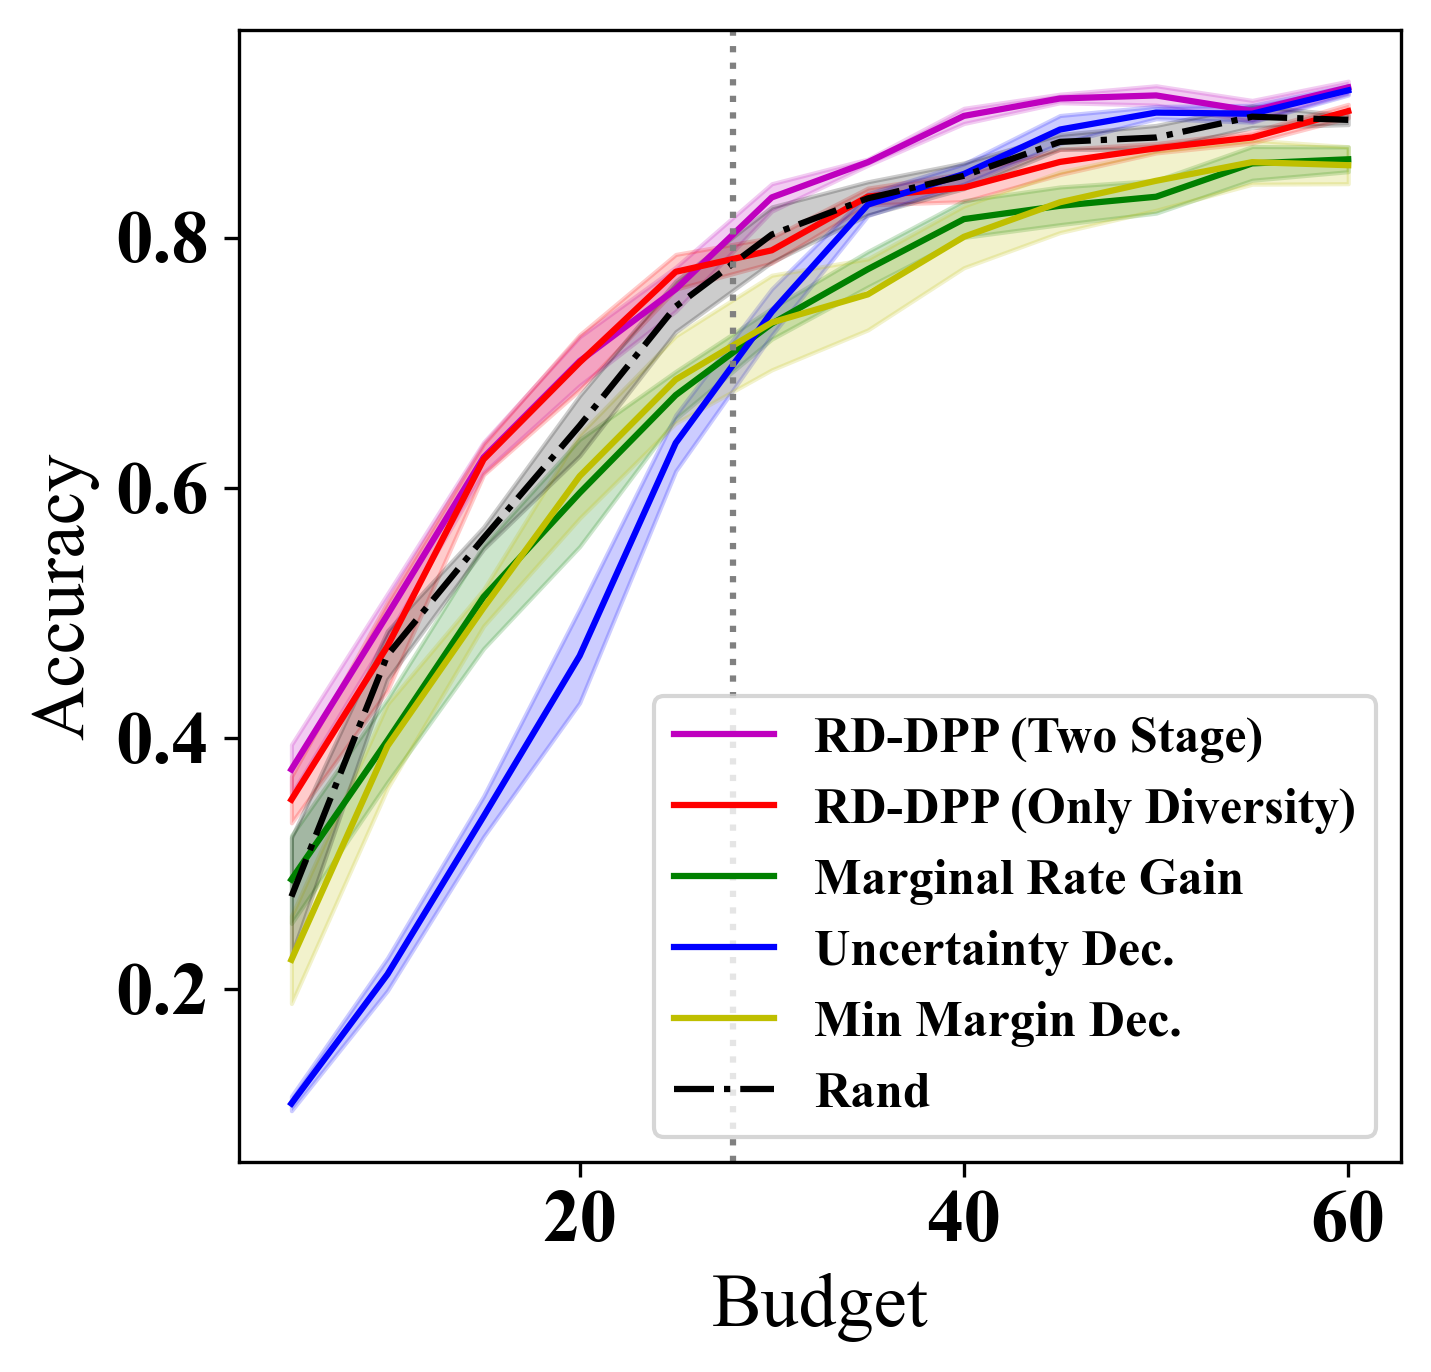

In [47]:
plt.figure(figsize= (5,5),dpi=300)

xaxis = np.array(range(1,1+Total_budget//period))*period

for j in range(6):
    if True:
        idx = Method_index[j]
        plot_with_variance(Summaray[idx,:],np.sqrt(Summaray_var[idx,:]),color = color_space[j],xaxis=xaxis)

plt.xlabel('Budget')
plt.ylabel('Accuracy')
# plt.legend(['rand','entropy','min-margin','margin gain','dpp','ada 0.5', 'ada 0.2'])
# L = ['Rand','Uncertainty Dec.','Min Margin Dec.','Marginal Rate Gain','RD-DPP (only diversity)','RD-DPP (Two stage)','RD-DPP (Two stage)']
# L2 = ['Rand','UD','MMD','MRG','RD-DPP(od)','RD-DPP (two)']
plt.legend(np.array(L)[Method_index])

plt.axvline(avg_trans*period,color='gray',linestyle=':')
# plt.savefig(f'{dataset_name}.png', bbox_inches = 'tight')
plt.savefig(f'{dataset_name}_{noise}.png', bbox_inches = 'tight')

In [ ]:
# save to csv


In [ ]:
Method_inde2x = [0,1,2,3,4,5,6]

In [ ]:
per1 = np.zeros((7,Total_budget//period),dtype=object)


In [ ]:
Method_inde2x

In [ ]:
S=Summaray[Method_inde2x,:]
SVAR = Summaray_var[Method_inde2x,:]

In [ ]:
for i in range(per1.shape[0]):
    for j in range(per1.shape[1]):
        per1[i,j] = format(S[i,j]*100,'.2f')

In [ ]:
import pandas as pd
df1 = pd.DataFrame(per1, columns = xaxis, index =np.array(L)[Method_inde2x])


In [ ]:
df1

In [ ]:
df1.to_csv(f'{dataset_name}_1_{noise}.csv') 

In [ ]:
per2 = np.zeros((7,Total_budget//period),dtype=object)
for i in range(per1.shape[0]):
    for j in range(per1.shape[1]):
        per2[i,j] = format(S[i,j]*100,'.2f')+'+-'+format(np.sqrt(SVAR[i,j])*100,'.2f')

In [ ]:
df2 = pd.DataFrame(per2, columns = xaxis, index =np.array(L)[Method_inde2x])


In [ ]:
df2

In [ ]:
df2.to_csv(f'{dataset_name}_2_{noise}.csv') 

# example of diversity

In [48]:
div = np.load(path+'/0_Total_60_batch_64MNIST_div.npy')

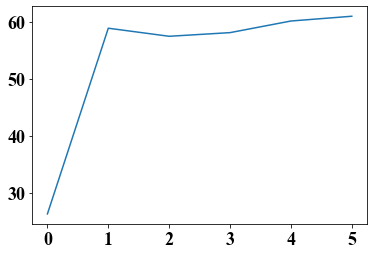

In [49]:
plt.plot(div)